In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
dfog = pd.read_csv('Assignment3_Dataset/population.csv')

In [2]:
df = pd.read_csv('Assignment3_Dataset/population.csv')
df50 = pd.read_csv('Assignment3_Dataset/more_than_50k.csv')
dfdesc = pd.read_csv('Assignment3_Dataset/Dataset Description.csv')

#### Dataset description

In [3]:
dfdesc

,Column Code,Distict Values,Column,Type
0,AAGE,91,age,numerical
1,ACLSWKR,9,class of worker,categorical
2,ADTIND,52,industry code,categorical
3,ADTOCC,47,occupation code,categorical
4,AHGA,17,education,categorical
5,AHRSPAY,1240,wage per hour,numerical
6,AHSCOL,3,enrolled in edu inst last wk,categorical
7,AMARITL,7,marital status,categorical
8,AMJIND,24,major industry code,categorical
9,AMJOCC,15,major occupation code,categorical


In [4]:
df.shape

(199523, 40)

In [5]:
df50.shape

(3580, 40)

#### Overall we have a large number of samples, but for people with more than 50k earning per year the number of samples is low

## Preprocessing

In [280]:
def preprocess(dfog):
    df = dfog.copy()
    tcols = df.select_dtypes(exclude=[np.number]).columns
    for col in tcols:
        df[col] = df[col].str.strip()
    df.replace('?', np.nan, inplace=True)
    dropped = ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS',
               'DIVVAL','AHSCOL', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'GRINREG', 'GRINST',
               'PEFNTVTY', 'PEMNTVTY', 'PENATVTY','PRCITSHP', 'VETQVA']
    df.drop(dropped, axis=1, inplace=True)
    for column in df.columns:
        df[column].fillna(modes[column][0], inplace=True)
    binner(df)
    le = preprocessing.LabelEncoder()
    df['YEAR'] = le.fit_transform(df['YEAR'])
    le = preprocessing.LabelEncoder()
    df['ASEX'] = le.fit_transform(df['ASEX'])
    dfp = df
    ignore = ['AAGE', 'ASEX', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK', 'YEAR']
    for col in df.columns:
        if col not in ignore:
            df = pd.get_dummies(data=df, columns=[col])
    ncomp = 65
    pca = PCA(n_components=ncomp)
    principalComponents = pca.fit_transform(df)
    pcadf = pd.DataFrame(data = principalComponents)
    fweights = pd.DataFrame(pca.components_, columns=df.columns)[:3]
    return dfp, pcadf, fweights

In [7]:
tcols = df.select_dtypes(exclude=[np.number]).columns

In [8]:
for col in tcols:
    df[col] = df[col].str.strip()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

#### No null values are found in the dataset
#### Missing values(denoted by ' ?') are replaced by nan

In [10]:
df.replace('?', np.nan, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

#### We can see that some of the columns now contain null values
#### MIGMTR1, MIGMTR3, MIGMTR4, and MIGSUN are missing data in more than 40% of sample, so these columns are dropped

In [12]:
df.drop(['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [14]:
len(df) - len(df.dropna())

8962

In [15]:
len(df)

199523

#### Only 8962 out of 199,523 samples now contain null values

## Feature Analysis

### Numerical data

C:\Users\aryan\AppData\Local\Temp/ipykernel_8452/999616018.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


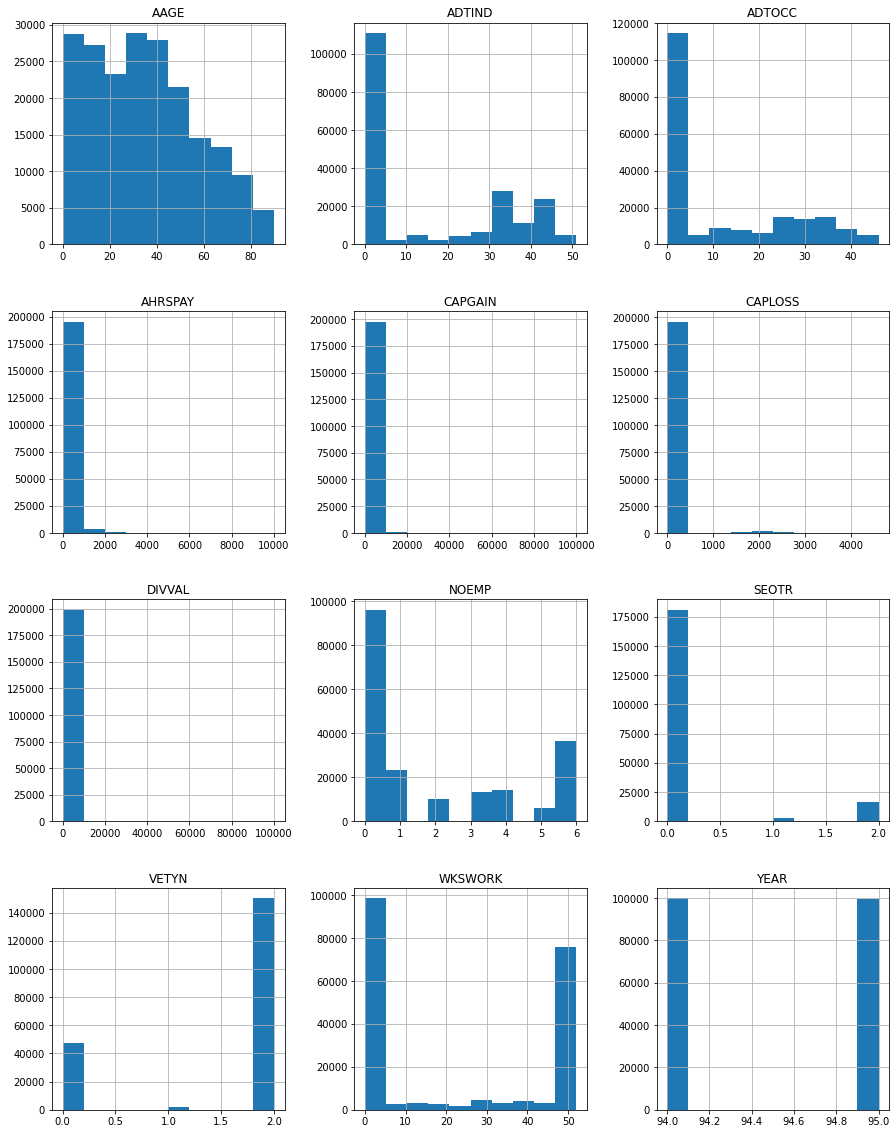

In [16]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.savefig('plots/histnum.png')

#### After Observing the above graphs, the following columns are dropped as they have most of their data in 1 column, and almost no data in the other columns
#### More than 85% data in 1 column, i.e 169,595 samples
#### Exception can be made for low number of unique values

In [17]:
dropped = ['AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL']

In [18]:
df.drop(dropped, axis=1, inplace=True)

### Categorical data

In [19]:
tcols = df.select_dtypes(exclude=[np.number]).columns
tcols

Index(['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA'],
      dtype='object')

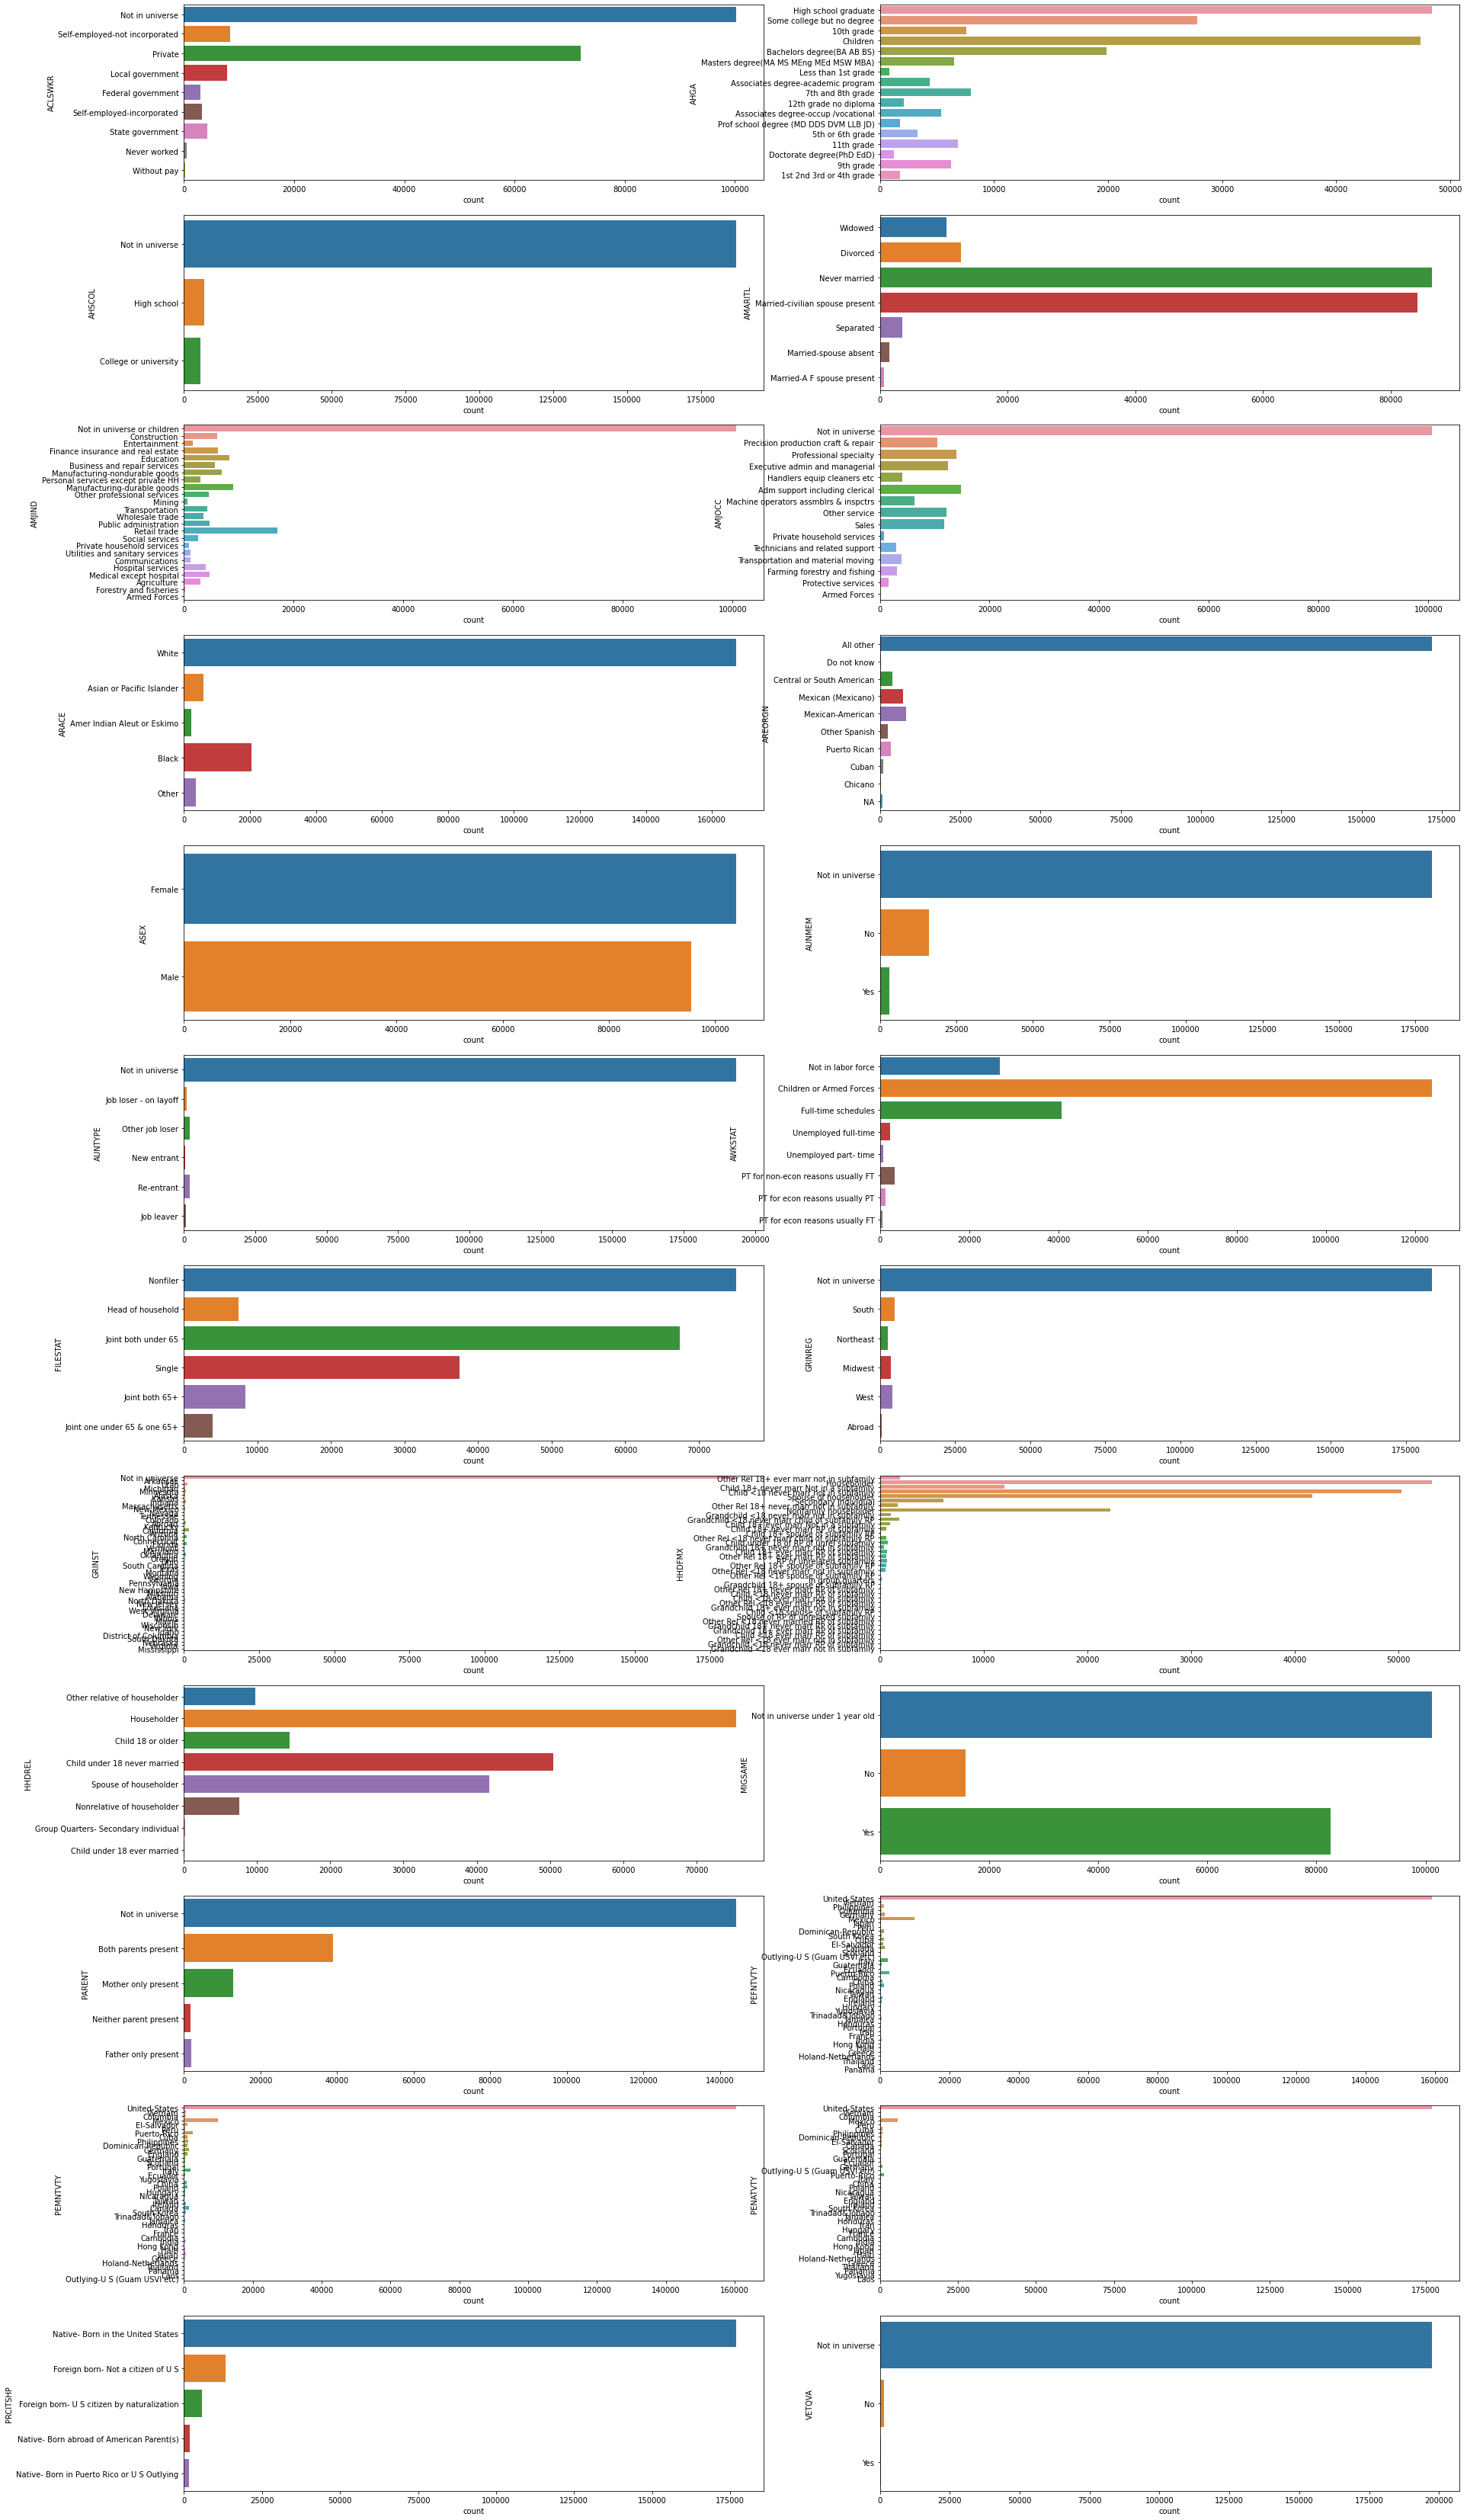

In [20]:
fig, axs = plt.subplots(12, 2, figsize=(30, 60))

for i, col in enumerate(tcols):
    sns.countplot(ax=axs[i//2, i%2], y=df[col])
plt.savefig('plots/histcat.png')

#### After Observing the above graphs, the following columns are dropped as they have most of their data in 1 column, and almost no data in the other columns
#### More than 85% data in 1 column, i.e 169,595 samples
#### Exception can be made for low number of unique values

In [21]:
dropped = ['AHSCOL', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'GRINREG', 'GRINST',
           'PEFNTVTY', 'PEMNTVTY', 'PENATVTY','PRCITSHP', 'VETQVA']

In [22]:
df.drop(dropped, axis=1, inplace=True)

In [23]:
df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ARACE,ASEX,...,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,SEOTR,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,Widowed,Not in universe or children,Not in universe,White,Female,...,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,0,Not in universe,0,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,Male,...,Head of household,Householder,Householder,No,1,Not in universe,0,2,52,94
2,18,Not in universe,0,0,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,...,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,0,Not in universe,0,2,0,95
3,9,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Female,...,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,0,0,0,94
4,10,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Female,...,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,0,0,0,94


In [24]:
df.shape

(199523, 21)

#### Now we have 21 attributes

## Imputation, Bucketization, and One-hot encoding

In [25]:
modes = df.mode()
modes

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ARACE,ASEX,...,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,SEOTR,VETYN,WKSWORK,YEAR
0,34,Not in universe,0,0,High school graduate,Never married,Not in universe or children,Not in universe,White,Female,...,Nonfiler,Householder,Householder,Not in universe under 1 year old,0,Not in universe,0,2,0,94


In [26]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AMARITL   199523 non-null  object
 6   AMJIND    199523 non-null  object
 7   AMJOCC    199523 non-null  object
 8   ARACE     199523 non-null  object
 9   ASEX      199523 non-null  object
 10  AWKSTAT   199523 non-null  object
 11  FILESTAT  199523 non-null  object
 12  HHDFMX    199523 non-null  object
 13  HHDREL    199523 non-null  object
 14  MIGSAME   199523 non-null  object
 15  NOEMP     199523 non-null  int64 
 16  PARENT    199523 non-null  object
 17  SEOTR     199523 non-null  int64 
 18  VETYN     199523 non-null  int64 
 19  WKSWORK   199523 non-null  int64 
 20  YEAR      199523 non-null 

#### There are now no nan values in our dataset

In [28]:
df.describe()

,AAGE,ADTIND,ADTOCC,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,6.000000,2.000000,2.000000,52.000000,95.000000


#### Out of the above columns with numeric values, only AAGE, NOEMP, and WKSWORK are numerical data. ADTIND and ADTOCC are codes while SEOTR, VETYN, and YEAR are categorical in nature.

In [29]:
def binner(df):
    binz = [-1, 15, 33, 50, 99]
    labelz = [0, 1, 2, 3]
    df['AAGE'] = pd.cut(df['AAGE'], binz, labels=labelz)

    binz = [-1, 1, 4, 6]
    labelz = [0, 1, 2]
    df['NOEMP'] = pd.cut(df['NOEMP'], binz, labels=labelz)

    binz = [-1, 0, 20, 45, 53]
    labelz = [0, 1, 2, 3]
    df['WKSWORK'] = pd.cut(df['WKSWORK'], binz, labels=labelz)

In [30]:
binner(df)

In [31]:
df.nunique()

AAGE         4
ACLSWKR      9
ADTIND      52
ADTOCC      47
AHGA        17
AMARITL      7
AMJIND      24
AMJOCC      15
ARACE        5
ASEX         2
AWKSTAT      8
FILESTAT     6
HHDFMX      38
HHDREL       8
MIGSAME      3
NOEMP        3
PARENT       5
SEOTR        3
VETYN        3
WKSWORK      4
YEAR         2
dtype: int64

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['YEAR'] = le.fit_transform(df['YEAR'])
le = preprocessing.LabelEncoder()
df['ASEX'] = le.fit_transform(df['ASEX'])

#### The numerical attributes and the attributes with 2 values are left as is, and the rest are one-hot encoded

In [33]:
df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ARACE,ASEX,...,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,SEOTR,VETYN,WKSWORK,YEAR
0,3,Not in universe,0,0,High school graduate,Widowed,Not in universe or children,Not in universe,White,0,...,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,0,Not in universe,0,2,0,1
1,3,Self-employed-not incorporated,4,34,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,1,...,Head of household,Householder,Householder,No,0,Not in universe,0,2,3,0
2,1,Not in universe,0,0,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,0,...,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,0,Not in universe,0,2,0,1
3,0,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,0,...,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,0,0,0,0
4,0,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,0,...,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,0,0,0,0


In [34]:
ignore = ['AAGE', 'ASEX', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK', 'YEAR']
dfone = df

for col in df.columns:
    if col not in ignore:
        dfone = pd.get_dummies(data=dfone, columns=[col])

In [35]:
dfone.head()

,AAGE,ASEX,NOEMP,SEOTR,VETYN,WKSWORK,YEAR,ACLSWKR_Federal government,ACLSWKR_Local government,ACLSWKR_Never worked,...,HHDREL_Other relative of householder,HHDREL_Spouse of householder,MIGSAME_No,MIGSAME_Not in universe under 1 year old,MIGSAME_Yes,PARENT_Both parents present,PARENT_Father only present,PARENT_Mother only present,PARENT_Neither parent present,PARENT_Not in universe
0,3,0,0,0,2,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,3,1,0,0,2,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,2,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## PCA

#### We perform PCA upto 100 components then plot the cumulative variance sum vs number of components

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(dfone)
principalDf = pd.DataFrame(data = principalComponents)

In [37]:
evr = pca.explained_variance_ratio_
csr = np.cumsum(evr)
csr

array([0.35884898, 0.47788084, 0.54081023, 0.58515218, 0.62005517,
       0.64300007, 0.66358969, 0.68206582, 0.6972533 , 0.71229807,
       0.7260566 , 0.73928067, 0.75075787, 0.76109024, 0.77084236,
       0.78031254, 0.78864205, 0.79672572, 0.80354509, 0.81014867,
       0.81659699, 0.82266313, 0.82847747, 0.83424043, 0.8397505 ,
       0.84495363, 0.8499945 , 0.85467258, 0.85909326, 0.86334776,
       0.8674746 , 0.87144439, 0.87515724, 0.87875772, 0.8821147 ,
       0.88541435, 0.8886447 , 0.89184903, 0.8949733 , 0.89803974,
       0.90101385, 0.90392803, 0.90677635, 0.90957796, 0.91232444,
       0.9149215 , 0.91745485, 0.91988452, 0.92230427, 0.92453436,
       0.92673852, 0.92875436, 0.93071251, 0.93260298, 0.93446075,
       0.93629942, 0.93805664, 0.93976646, 0.9414373 , 0.94303699,
       0.94456824, 0.94607663, 0.94758187, 0.94906631, 0.95052757,
       0.95194865, 0.95335883, 0.95470448, 0.95599114, 0.95720445,
       0.95839233, 0.95955378, 0.96067081, 0.96176715, 0.96284

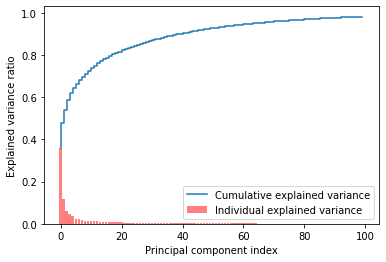

In [38]:
plt.bar(range(len(evr)), evr, alpha=0.5, label='Individual explained variance', color='red')
plt.step(range(len(csr)), csr, label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.rcParams["figure.figsize"] = (18,8)
plt.show()

#### We can see that there are heavily diminishing returns after about 40 components, and very low variance contributed after the 80th/90th component

#### 95% variance captured is a good threshold, so 65 is components are chosen

In [39]:
ncomp = 65
pca = PCA(n_components=ncomp)
principalComponents = pca.fit_transform(dfone)
pcadf = pd.DataFrame(data = principalComponents)

In [40]:
pcadf

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.880940,-2.590567,1.014971,-0.395125,0.603089,0.027636,-0.326995,0.006754,0.229560,0.248050,...,0.023097,0.088716,-0.163921,-0.072723,0.064518,0.233919,0.044019,-0.074762,-0.040308,-0.037111
1,-2.120633,-0.393556,-0.778979,-1.132779,-0.968599,-1.017950,-0.757638,0.359888,-0.218363,-0.641320,...,-0.017202,-0.092709,-0.117652,0.035033,-0.067375,0.114467,-0.101312,-0.011319,0.162061,-0.197538
2,1.666305,-0.983159,1.207904,-0.402350,1.126188,-0.123398,0.748452,-0.879637,-0.066065,-0.906026,...,-0.033791,-0.072937,0.101252,0.052384,-0.040167,-0.038760,-0.353530,0.290808,-0.071612,0.039920
3,3.371638,1.016129,-0.802035,0.231861,-0.061648,0.087904,-0.305184,0.285531,0.128219,0.192658,...,-0.010793,-0.004871,0.004100,-0.004453,-0.028466,-0.013017,0.021280,-0.006418,0.019018,0.092896
4,3.371638,1.016129,-0.802035,0.231861,-0.061648,0.087904,-0.305184,0.285531,0.128219,0.192658,...,-0.010793,-0.004871,0.004100,-0.004453,-0.028466,-0.013017,0.021280,-0.006418,0.019018,0.092896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0.442308,-2.795495,0.927320,-0.585512,-0.900538,0.073904,0.394521,-0.090217,-0.382147,0.197749,...,0.027560,-0.053372,0.117819,0.038616,-0.007656,-0.063849,-0.096580,-0.010932,-0.002727,-0.054965
199519,-2.182516,-0.564464,-1.231513,-0.577367,-1.224583,-0.832736,-0.765956,0.296175,-0.371373,-0.421509,...,-0.071438,0.104881,0.361647,-0.236266,-0.068876,-0.453847,0.057351,0.361894,-0.541102,0.003077
199520,-1.501855,-0.292391,0.340740,-0.038302,-1.258560,1.593351,0.389268,-0.041736,-0.865948,-0.515531,...,0.034478,0.019777,-0.020990,0.029685,0.017963,0.004587,-0.002532,0.021521,0.013332,-0.103790
199521,2.244822,-0.517856,1.200483,-0.092222,0.471025,-0.019050,0.084774,-0.094132,-0.271001,0.106666,...,-0.000906,0.018245,-0.022783,-0.008903,0.022111,-0.013209,-0.006311,0.045817,-0.026754,-0.054953


#### Weights for first 3 principal components mapped with features

In [41]:
fweights = pd.DataFrame(pca.components_, columns=dfone.columns)[:3]
fweights

,AAGE,ASEX,NOEMP,SEOTR,VETYN,WKSWORK,YEAR,ACLSWKR_Federal government,ACLSWKR_Local government,ACLSWKR_Never worked,...,HHDREL_Other relative of householder,HHDREL_Spouse of householder,MIGSAME_No,MIGSAME_Not in universe under 1 year old,MIGSAME_Yes,PARENT_Both parents present,PARENT_Father only present,PARENT_Mother only present,PARENT_Neither parent present,PARENT_Not in universe
0,-0.301791,-0.012109,-0.247651,-0.065473,-0.302242,-0.552170,-0.006030,-0.006343,-0.016002,0.000681,...,0.009411,-0.048416,0.000192,-0.001208,0.001016,0.116064,0.005298,0.036827,0.004223,-0.162411
1,-0.611539,0.059796,0.206498,0.074667,-0.267295,0.394273,-0.012915,0.003513,0.007233,-0.000513,...,-0.001111,-0.080928,0.019661,-0.008559,-0.011102,0.108805,0.004370,0.030348,0.002543,-0.146067
2,-0.054865,-0.002381,0.016570,0.016203,0.001183,-0.026231,0.509200,-0.000126,-0.002111,0.000225,...,0.003696,-0.017655,-0.049049,0.510619,-0.461569,0.005468,0.000838,0.002864,0.000542,-0.009712


## Clustering

In [42]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample

In [43]:
errors = {'clusters' : [], 'wce' : []}
clist = []
mlist = []

for i in range(10, 25):
    print(i, 'clusters')
    medians = np.random.randn(i, 65)
    kmedmodel = kmedians(pcadf[:10000], medians)
    kmedmodel.process()
    clist.append(kmedmodel.get_clusters())
    mlist.append(kmedmodel.get_medians())
    errors['clusters'].append(i)
    errors['wce'].append(kmedmodel.get_total_wce())

10 clusters
11 clusters
12 clusters
13 clusters
14 clusters
15 clusters
16 clusters
17 clusters
18 clusters
19 clusters
20 clusters
21 clusters
22 clusters
23 clusters
24 clusters


In [111]:
e2 = []
for i in range(10, 25):
    e2.append(errors['wce'][i-10] / i)

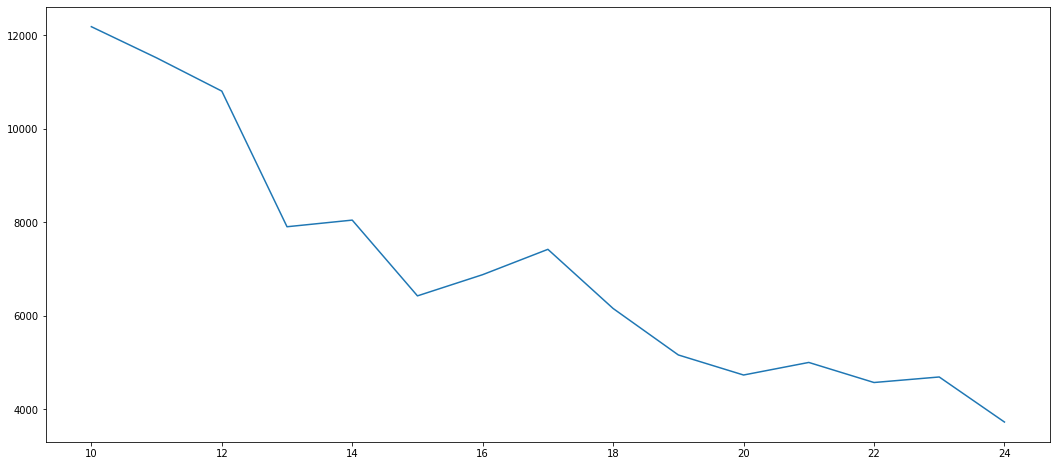

In [112]:
plt.plot(errors['clusters'], e2)

### 13 clusters are chosen as it consistently gives low error while also taking less time to train

In [78]:
k = 15
np.random.seed(0)
medians = np.random.randn(k, 65)
model = kmedians(pcadf, medians)
model.process()

In [79]:
clusters = model.get_clusters()
cmeds = model.get_medians()

In [124]:
model.get_total_wce()/len(pcadf)

10.809216897319589

## processing morethan50k dataset

In [281]:
dfp50, pcadf50, fweights50 = preprocess(df50)
pcadf50.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.588750,0.624992,-1.361102,-0.288084,-0.121129,-0.621812,0.220019,-1.011519,0.144138,-0.298152,...,-0.083388,0.024823,0.249476,0.069344,0.258369,-0.146849,-0.377004,-0.192384,0.012855,0.250915
1,0.638367,-0.911442,0.305966,1.425838,-0.150868,-0.375197,-0.354228,0.366482,0.792910,-0.268428,...,-0.899351,0.726865,-0.209738,0.824029,0.265499,-0.044780,0.221143,0.021810,0.355017,0.210016
2,0.494419,-1.254703,-0.353666,-0.380613,0.852623,0.095862,-0.390895,-0.224594,0.906000,-0.039190,...,-0.074265,0.061161,0.007564,0.010021,-0.148604,-0.089491,-0.021371,0.127646,-0.004069,0.177808
3,-1.043181,0.786872,1.219386,-0.321217,-1.117579,-1.076549,0.877117,0.374669,-0.119835,-0.346679,...,-0.050003,-0.050193,-0.018175,-0.025761,-0.082246,-0.193305,-0.024701,-0.064034,0.332016,-0.103143
4,-1.636056,0.150624,0.742127,1.537581,0.312320,-0.041944,-0.392361,1.017003,-0.549505,0.452773,...,0.059140,0.076345,0.493199,0.029991,0.586369,-0.184143,0.010639,0.066571,-0.073335,0.313302


In [282]:
k = 15
np.random.seed(72)
medians = np.random.randn(k, 65)
model50 = kmedians(pcadf50, medians)
model50.process()

In [283]:
clusters50 = model50.get_clusters()
cmeds50 = model50.get_medians()

In [284]:
model50.get_total_wce()/len(df50)

10.79754839496541

In [285]:
len(clusters50)

13

### We can see that avg distance from median for the samples is lower in the general population dataset. This may be because of the higher number of samples allowing for better clustering

## 6.1

In [286]:
cdata = []
cdata50 = []

for c in clusters:
    cdata.append(dfog.iloc[c])
for c in clusters50:
    cdata50.append(df50.iloc[c])

In [287]:
prop = []

for cls in cdata:
    prop.append(len(cls))
prop = np.array(prop)
total = prop.sum()
prop = prop / total
prop

array([0.12370002, 0.10975176, 0.07755998, 0.01430412, 0.04143883,
       0.03556482, 0.03027721, 0.0499391 , 0.08853616, 0.02478912,
       0.26176932, 0.0633561 , 0.07901345])

<BarContainer object of 13 artists>

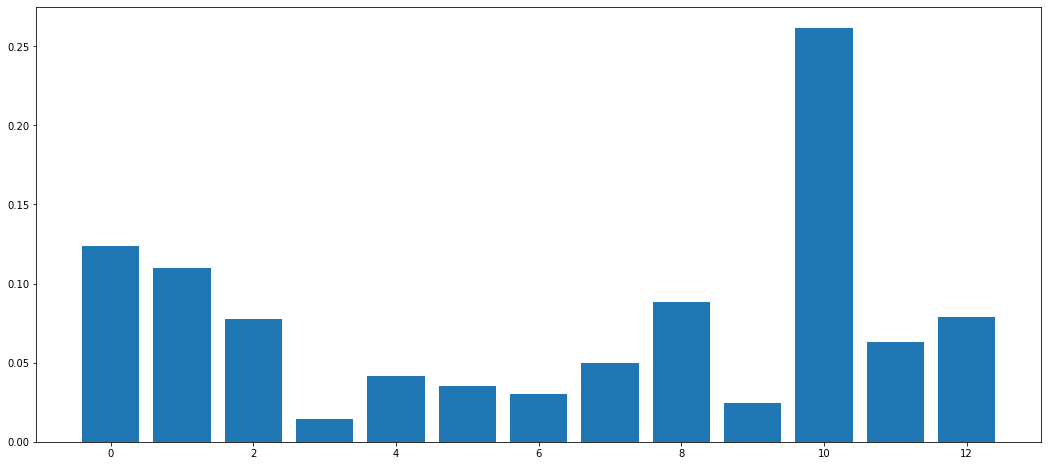

In [288]:
plt.bar(np.arange(len(prop)), prop)

In [289]:
prop50 = []

for cls in cdata50:
    prop50.append(len(cls))
prop50 = np.array(prop50)
total = prop50.sum()
prop50 = prop50 / total
prop50

array([0.03379888, 0.15865922, 0.02960894, 0.05530726, 0.01955307,
       0.06536313, 0.05139665, 0.15418994, 0.1377095 , 0.01871508,
       0.03631285, 0.14189944, 0.09748603])

<BarContainer object of 13 artists>

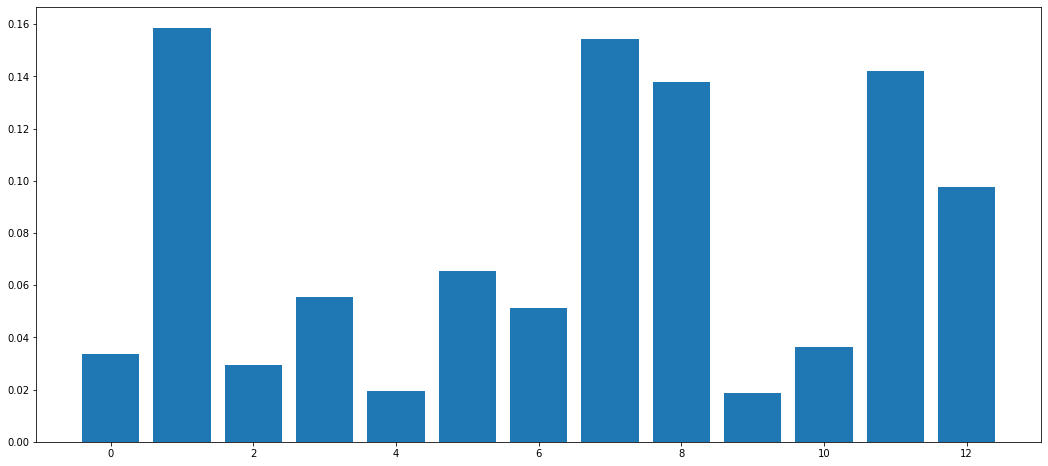

In [290]:
plt.bar(np.arange(len(prop50)), prop50)

## 6.2

#### Data in the general population dataset is more evenly distributed among the clusters, with 1 outlier cluster. While in the morethan50k dataset some clusters contain a very small number of samples, while others have more.

#### Cluster 10 is heavily present in the general population but not in the morethan60k datatset
#### Cluster 7 is heavily present in the morethan50k dataset but not in the general population.

## 6.3

### Finding components that have high magnitude for morethan50k data

In [318]:
wdict = dict(fweights50.iloc[0])
wdict = dict(sorted(wdict.items(), key=lambda item: item[1], reverse=True))
wdict

{'AWKSTAT_Children or Armed Forces': 0.3061781267289424,
 'MIGSAME_Yes': 0.2816392396567427,
 'AAGE': 0.1809696782400662,
 'ADTIND_0': 0.14504012035137107,
 'ADTOCC_0': 0.14504012035137107,
 'AMJIND_Not in universe or children': 0.14504012035137107,
 'AMJOCC_Not in universe': 0.14504012035137107,
 'ACLSWKR_Not in universe': 0.14435707994065125,
 'FILESTAT_Joint both 65+': 0.052680106905291325,
 'AWKSTAT_Not in labor force': 0.04937915060503877,
 'ACLSWKR_Self-employed-not incorporated': 0.039369944969297424,
 'HHDREL_Householder': 0.0373671382462985,
 'HHDFMX_Nonfamily householder': 0.03730565462374071,
 'FILESTAT_Single': 0.03129657741056734,
 'AMARITL_Widowed': 0.02842992117729735,
 'MIGSAME_No': 0.023961697486874614,
 'AHGA_High school graduate': 0.022481176625332916,
 'ARACE_White': 0.019305361551646912,
 'FILESTAT_Joint one under 65 & one 65+': 0.017703767713415385,
 'ACLSWKR_Self-employed-incorporated': 0.016861507166227575,
 'AMARITL_Divorced': 0.011592187297939694,
 'AHGA_Prof 

#### Exploring cluster 7

In [315]:
print('General population')
print(cdata[7]['AWKSTAT'].value_counts())
print('\nmorethan50k')
print(cdata50[7]['AWKSTAT'].value_counts())

General population
 Children or Armed Forces              8173
 Full-time schedules                   1267
 PT for non-econ reasons usually FT     159
 Unemployed full-time                   132
 Not in labor force                     107
 PT for econ reasons usually PT          55
 Unemployed part- time                   38
 PT for econ reasons usually FT          33
Name: AWKSTAT, dtype: int64

morethan50k
 Full-time schedules                   505
 PT for non-econ reasons usually FT     21
 PT for econ reasons usually PT          8
 Not in labor force                      6
 Unemployed full-time                    6
 Children or Armed Forces                2
 Unemployed part- time                   2
 PT for econ reasons usually FT          2
Name: AWKSTAT, dtype: int64


### We can see that in the general population most people are either children or in the armed forces, but in the morethan50k population more than 90% of people have full-time schedules

In [320]:
cdata[7].describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,28.652449,31.345444,22.459855,99.794159,305.998294,63.803191,60.832096,4.046166,0.792051,1.994580,45.833501,94.182055
std,9.038374,12.421093,11.955549,314.467653,3051.857775,341.833827,683.259075,1.879988,0.965381,0.073421,11.115206,0.385910
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.000000
25%,22.000000,29.000000,14.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,44.000000,94.000000
50%,26.000000,33.000000,25.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,94.000000
75%,32.000000,40.000000,31.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,2.000000,52.000000,94.000000
max,90.000000,51.000000,46.000000,7400.000000,99999.000000,2824.000000,20000.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [322]:
cdata[7].mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,23,Private,33,19,Some college but no degree,0,Not in universe,Never married,Retail trade,Sales,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


In [321]:
cdata50[7].describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.0
mean,45.000000,25.065217,12.646739,64.815217,4630.563406,231.371377,927.173913,4.396739,0.056159,1.983696,51.034420,95.0
std,9.857423,13.247446,13.035211,378.787001,16119.104534,646.988471,3954.863764,1.851136,0.292864,0.126758,4.891258,0.0
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,95.0
25%,38.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,52.000000,95.0
50%,45.000000,29.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,52.000000,95.0
75%,51.000000,34.000000,18.000000,0.000000,0.000000,0.000000,350.000000,6.000000,0.000000,2.000000,52.000000,95.0
max,80.000000,50.000000,45.000000,3700.000000,99999.000000,2547.000000,50110.000000,6.000000,2.000000,2.000000,52.000000,95.0


In [323]:
cdata50[7].mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,47,Private,32,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95


### The morethan50k population has a significantly higher age, are much more likely to have a college degree, and are usually married

In [330]:
print('General population')
print(cdata[7]['AMJOCC'].value_counts())
print('\nmorethan50k')
print(cdata50[7]['AMJOCC'].value_counts())

General population
 Sales                                    1823
 Adm support including clerical           1721
 Other service                            1388
 Professional specialty                   1104
 Executive admin and managerial            770
 Machine operators assmblrs & inspctrs     555
 Precision production craft & repair       535
 Handlers equip cleaners etc               455
 Not in universe                           408
 Transportation and material moving        399
 Technicians and related support           314
 Farming forestry and fishing              226
 Protective services                       199
 Private household services                 58
 Armed Forces                                9
Name: AMJOCC, dtype: int64

morethan50k
 Executive admin and managerial           276
 Sales                                    100
 Precision production craft & repair       59
 Professional specialty                    22
 Technicians and related support           20
 Machi

### A large proportion of the general population is in sales and clerical services, while the morethan50k population are in Managerial positions

## 6.4

### Finding components that have high magnitude for general population data

In [332]:
wdict2 = dict(fweights.iloc[0])
wdict2 = dict(sorted(wdict2.items(), key=lambda item: item[1], reverse=True))
wdict2

{'ADTIND_0': 0.19214918629849392,
 'ADTOCC_0': 0.19214918629849392,
 'AMJIND_Not in universe or children': 0.19214918629849392,
 'AMJOCC_Not in universe': 0.19214918629849392,
 'ACLSWKR_Not in universe': 0.1914681883053748,
 'FILESTAT_Nonfiler': 0.18074380489289876,
 'AHGA_Children': 0.15132908151668242,
 'HHDREL_Child under 18 never married': 0.1492012185975741,
 'HHDFMX_Child <18 never marr not in subfamily': 0.14905399873881378,
 'AMARITL_Never married': 0.13796027327047147,
 'PARENT_Both parents present': 0.11606438330662446,
 'AWKSTAT_Children or Armed Forces': 0.0806791975064493,
 'PARENT_Mother only present': 0.03682652532615708,
 'AWKSTAT_Not in labor force': 0.01888962357196033,
 'ARACE_Black': 0.009558083057683558,
 'HHDREL_Other relative of householder': 0.009410934959181768,
 'PARENT_Father only present': 0.005297961294840777,
 'HHDFMX_Grandchild <18 never marr child of subfamily RP': 0.0052744967474454155,
 'PARENT_Neither parent present': 0.004222509534301744,
 'AHGA_9th 

#### Exploring cluster 10

In [335]:
print('General population')
print(cdata[10]['AMJIND'].value_counts())
print('\nmorethan50k')
print(cdata50[10]['AMJIND'].value_counts())

General population
 Not in universe or children    52229
Name: AMJIND, dtype: int64

morethan50k
 Business and repair services         53
 Other professional services          14
 Hospital services                    14
 Manufacturing-nondurable goods        7
 Medical except hospital               7
 Finance insurance and real estate     7
 Public administration                 6
 Manufacturing-durable goods           4
 Retail trade                          3
 Construction                          3
 Communications                        3
 Mining                                2
 Forestry and fisheries                2
 Entertainment                         1
 Social services                       1
 Agriculture                           1
 Wholesale trade                       1
 Utilities and sanitary services       1
Name: AMJIND, dtype: int64


### We can see that in the general population this cluster mostly has people that are children, but in the morethan50k population cluster most people are working in Businesses, hospitals, and other professional services

In [336]:
cdata[10].describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,52229.000000,52229.0,52229.0,52229.0,52229.000000,52229.000000,52229.000000,52229.000000,52229.000000,52229.000000,52229.000000,52229.000000
mean,7.789159,0.0,0.0,0.0,0.675544,0.567865,0.493500,0.022976,0.001551,0.184495,0.098432,94.500814
std,4.796950,0.0,0.0,0.0,149.233500,34.620868,22.549375,0.292107,0.055500,0.578690,1.227922,0.500004
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,4.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
50%,8.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,12.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
max,27.000000,0.0,0.0,0.0,34095.000000,2704.000000,2500.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [338]:
cdata[10].mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,5,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95


In [337]:
cdata50[10].describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,43.500000,35.915385,10.584615,157.761538,7636.300000,220.830769,1247.223077,4.269231,0.176923,1.984615,50.807692,94.915385
std,8.787985,10.020935,8.656032,603.337292,22637.451898,643.292730,6524.724093,1.928121,0.489667,0.123553,4.322460,0.279385
min,29.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.000000,94.000000
25%,37.000000,37.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,52.000000,95.000000
50%,42.000000,37.000000,8.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,52.000000,95.000000
75%,48.000000,41.000000,12.000000,0.000000,3823.750000,0.000000,26.000000,6.000000,0.000000,2.000000,52.000000,95.000000
max,77.000000,50.000000,37.000000,3259.000000,99999.000000,2824.000000,60000.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [340]:
cdata50[10].mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,36,Private,37.0,5.0,Bachelors degree(BA AB BS),0.0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0.0,Not in universe,2.0,52.0,95.0
1,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The morethan50k population cluster has a significantly higher age, are much more likely to have a college degree, and are usually married, while the general population cluster has almost all children

In [342]:
print('General population')
print(cdata[10]['VETYN'].value_counts())
print('\nmorethan50k')
print(cdata50[10]['VETYN'].value_counts())

General population
0    47409
2     4816
1        4
Name: VETYN, dtype: int64

morethan50k
2    128
1      2
Name: VETYN, dtype: int64


### The morethan50k population cluster also has a very high number of people with veteran's benefits.